<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Modelador_estadistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from openpyxl import workbook , load_workbook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # Regresion multiple

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
Bolivar = pd.read_excel("/content/drive/MyDrive/U CENTRAL ECONOMÍA/PRACTICAS/GRUPO BOLIVAR/base_prueba (1).xlsx", sheet_name="Hoja 1",header=0, index_col=None) 
Bolivar.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,IDCATEGORIA,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
0,1,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.661019,1.737997e+08
1,2,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.401477,1.743664e+08
2,3,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.091686,SAN CRISTOBAL,YOMASA,39.420774,1.831345e+08
3,4,2016-01-05,1,0,2,3,0,24,0,0,NaN,Apartamento,1,4.583075,-74.168148,CIUDAD BOLIVAR,EL PENON DEL CORTIJO,37.464301,2.253010e+08
4,5,2016-01-05,1,0,2,2,0,6,0,0,2.0,Apartamento,0,4.525112,-74.087588,SAN CRISTOBAL,JUAN REY (LA PAZ),37.690574,1.759704e+08


In [111]:
Bolivar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     10121 non-null  int64         
 1   F_FECHAAVALUO          10121 non-null  datetime64[ns]
 2   TOT_BANOS              10121 non-null  int64         
 3   DEPOSITO               10121 non-null  int64         
 4   HABITACIONES           10121 non-null  int64         
 5   ESTRATO                10121 non-null  int64         
 6   TOTALGARAJES           10121 non-null  int64         
 7   PISOS                  10121 non-null  int64         
 8   SOTANOS                10121 non-null  int64         
 9   ANTIGUEDAD             10121 non-null  int64         
 10  EDIPISO                8986 non-null   float64       
 11  IDCATEGORIA            10121 non-null  object        
 12  ASCENSOR               10121 non-null  int64         
 13  L

In [112]:
Bolivar.describe()

,ID,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,ASCENSOR,LATITUD,LONGITUD,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
count,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,8986.000000,10121.000000,10121.000000,10121.000000,10121.000000,1.012100e+04
mean,5061.000000,1.323189,0.000988,2.305207,2.328130,0.006719,9.126964,0.043672,0.001877,4.938682,0.366960,4.633952,-74.155249,44.493168,1.907487e+08
std,2921.825371,0.467929,0.031419,0.582707,0.473537,0.081696,4.580072,0.218849,0.043289,3.532175,0.481999,0.070433,0.048304,5.255083,2.464278e+07
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.476112,-74.216996,22.266166,1.553078e+08
25%,2531.000000,1.000000,0.000000,2.000000,2.000000,0.000000,6.000000,0.000000,0.000000,2.000000,0.000000,4.611131,-74.208240,42.934870,1.654550e+08
50%,5061.000000,1.000000,0.000000,2.000000,2.000000,0.000000,6.000000,0.000000,0.000000,4.000000,0.000000,4.627112,-74.157344,44.458508,2.000398e+08
75%,7591.000000,2.000000,0.000000,3.000000,3.000000,0.000000,13.000000,0.000000,0.000000,6.000000,1.000000,4.691871,-74.117502,46.451695,2.108305e+08
max,10121.000000,2.000000,1.000000,3.000000,4.000000,1.000000,30.000000,3.000000,1.000000,25.000000,1.000000,4.761901,-74.026534,92.285299,8.421320e+08


**Avaluo del Inmueble**
\begin{equation}
Avaluo = β_1(N_{Habitaciones})+β_2(N_{Baños})+β_3(Estrato)+β_4(N_{Garajes})+β_5(N_{Pisos})+β_5(N_{Antiguedad})+β_6(N_{ ascensores})
\end{equation}


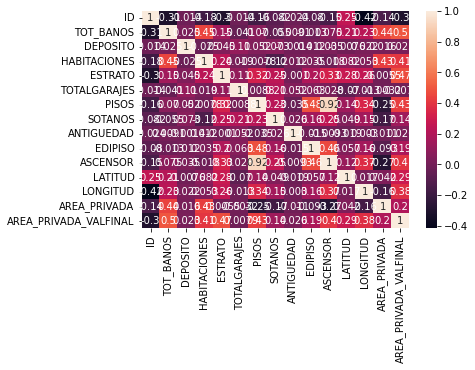

In [113]:
Bolivar=Bolivar.corr(method="spearman") 
sns.heatmap(Bolivar,annot=True) # Diagrama de correlacion 

In [114]:
corr_matrix = Bolivar.corr(method='pearson')
corr_matrix

,ID,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,ASCENSOR,LATITUD,LONGITUD,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
ID,1.000000,-0.572777,-0.003739,-0.416446,-0.604273,-0.002112,-0.368118,-0.181062,0.000767,-0.239158,-0.361254,0.285866,-0.724997,-0.193982,-0.701918
TOT_BANOS,-0.572777,1.000000,-0.162221,0.737536,0.215298,-0.306733,-0.095080,-0.349619,-0.137702,-0.220231,-0.113906,0.145996,0.270882,0.665162,0.665865
DEPOSITO,-0.003739,-0.162221,1.000000,-0.214660,-0.137108,0.124060,-0.103869,0.017850,-0.096225,-0.138566,-0.115356,-0.229944,-0.093268,-0.079236,-0.232543
HABITACIONES,-0.416446,0.737536,-0.214660,1.000000,0.217182,-0.198647,-0.240908,-0.456544,-0.113965,-0.220514,-0.265285,0.021247,0.022504,0.711804,0.514895
ESTRATO,-0.604273,0.215298,-0.137108,0.217182,1.000000,-0.050442,0.490682,0.318799,-0.208466,0.304976,0.483980,0.228259,0.519663,-0.147784,0.679153
TOTALGARAJES,-0.002112,-0.306733,0.124060,-0.198647,-0.050442,1.000000,-0.153084,0.264799,0.012478,-0.058310,-0.134501,-0.368021,-0.156121,-0.137030,-0.313706
PISOS,-0.368118,-0.095080,-0.103869,-0.240908,0.490682,-0.153084,1.000000,0.377963,-0.230714,0.730033,0.995209,0.025884,0.596095,-0.583318,0.479507
SOTANOS,-0.181062,-0.349619,0.017850,-0.456544,0.318799,0.264799,0.377963,1.000000,-0.087865,0.281221,0.401849,-0.127451,0.270326,-0.533124,0.031049
ANTIGUEDAD,0.000767,-0.137702,-0.096225,-0.113965,-0.208466,0.012478,-0.230714,-0.087865,1.000000,-0.206568,-0.209057,-0.224132,-0.128657,-0.054733,-0.218857
EDIPISO,-0.239158,-0.220231,-0.138566,-0.220514,0.304976,-0.058310,0.730033,0.281221,-0.206568,1.000000,0.717454,-0.095310,0.348868,-0.450409,0.212408


In [115]:
est = smf.ols(formula='Bolivar["AREA_PRIVADA_VALFINAL"]~ Bolivar["ESTRATO"] + Bolivar["HABITACIONES"]+ Bolivar["TOTALGARAJES"]+Bolivar["EDIPISO"]+Bolivar["ASCENSOR"]', data = Bolivar ).fit() # regresion lineal 
est.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Bolivar["AREA_PRIVADA_VALFINAL"]   R-squared:                       0.753
Model:                                          OLS   Adj. R-squared:                  0.615
Method:                               Least Squares   F-statistic:                     5.481
Date:                              Fri, 26 Aug 2022   Prob (F-statistic):             0.0137
Time:                                      16:55:07   Log-Likelihood:                 7.8525
No. Observations:                                15   AIC:                            -3.705
Df Residuals:                                     9   BIC:                            0.5433
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0559      0.077      0.730      0.484      -0.117       0.229
Bolivar["ESTRATO"]          0.3804      0.222      1.716      0.120      -0.121       0.882
Bolivar["HABITACIONES"]     0.5027      0.193      2.609      0.028       0.067       0.938
Bolivar["TOTALGARAJES"]    -0.1537      0.200     -0.767      0.463      -0.607       0.300
Bolivar["EDIPISO"]         -0.1732      0.250     -0.693      0.506      -0.739       0.393
Bolivar["ASCENSOR"]         0.4311      0.233      1.852      0.097      -0.095       0.958
==============================================================================
Omnibus:                       11.378   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.905
Skew:                           1.268   Prob(JB):                       0.0192
Kurtosis:                       5.493   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""